In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1. Official model code training

In [3]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

fatal: destination path 'stylegan2-ada-pytorch' already exists and is not an empty directory.


In [5]:
%cd /kaggle/working/stylegan2-ada-pytorch

/kaggle/working/stylegan2-ada-pytorch


In [6]:
%pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 684.8 kB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 56.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0
    Uninstalling torchvision-0.14.0:
      Successfully uninstalled torchvision-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchmetrics 0.11.4 requires torch>=1.8.1, but you have torch 1.7.1+cu110 which is incompatible.
pytorch-lightning 1.9.4 requires torch>=1.10.0, but you have torch 1.7.1+cu110 which is incompatible.
kornia 0.6.11 requires torch>=1.9.1, but you have 

In [7]:
%pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.9/207.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 46.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
!wget -P /kaggle/working/data https://www.dropbox.com/s/0drwlqbs82ibzvm/ct_dataset_1500.zip

--2023-04-17 09:27:48--  https://www.dropbox.com/s/0drwlqbs82ibzvm/ct_dataset_1500.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0drwlqbs82ibzvm/ct_dataset_1500.zip [following]
--2023-04-17 09:27:48--  https://www.dropbox.com/s/raw/0drwlqbs82ibzvm/ct_dataset_1500.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc913251b7978eb482f91c6cfe12.dl.dropboxusercontent.com/cd/0/inline/B6UVIiMaUcSufJj9uBbgMw09UnrA7aoHhtcgee8zqp0aXje5Ezz9DywkeaSLVk0lP9fnOnGAzrFPUgslccqUhj9DKkVXbkx-Px5mNhXliTkonSaDThhRfNuadMUdGon8WqHzjJEVbOCUTRnRaPOdvIx1MvXdzHEgChx5jiAZj-Vd3g/file# [following]
--2023-04-17 09:27:49--  https://uc913251b7978eb482f91c6cfe12.dl.dropboxusercontent.com/cd/0/inline/B6UVIiMaUcSufJj9uBbgMw09UnrA7aoHhtcgee8zqp0aXje5Ezz9DywkeaS

In [11]:
!ls

Dockerfile	 dataset_tool.py  generate.py	style_mixing.py
LICENSE.txt	 dnnlib		  legacy.py	torch_utils
README.md	 docker_run.sh	  metrics	train.py
calc_metrics.py  docs		  projector.py	training


In [13]:
!python ./dataset_tool.py --source=/kaggle/working/data/ct_dataset_1500.zip --dest=/kaggle/working/data/ct_dataset_1500_128.zip --width=128 --height=128

100%|█████████████████████████████████████▉| 1505/1506 [00:08<00:00, 171.22it/s]
Traceback (most recent call last):
  File "./dataset_tool.py", line 444, in <module>
    convert_dataset() # pylint: disable=no-value-for-parameter
  File "/opt/conda/lib/python3.7/site-packages/click/core.py", line 1128, in __call__
    return self.main(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/click/core.py", line 1053, in main
    rv = self.invoke(ctx)
  File "/opt/conda/lib/python3.7/site-packages/click/core.py", line 1395, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/opt/conda/lib/python3.7/site-packages/click/core.py", line 754, in invoke
    return __callback(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/click/decorators.py", line 26, in new_func
    return f(get_current_context(), *args, **kwargs)
  File "./dataset_tool.py", line 395, in convert_dataset
    for idx, image in tqdm(enumerate(input_iter), total=num_files):
  File "/opt/c

In [14]:
!mkdir /kaggle/working/training_runs

In [15]:
!python train.py --outdir=/kaggle/working/training_runs --data=/kaggle/working/data/ct_dataset_1500_128.zip --dry-run


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 50,
  "network_snapshot_ticks": 50,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/kaggle/working/data/ct_dataset_1500_128.zip",
    "use_labels": false,
    "max_size": 1505,
    "xflip": false,
    "resolution": 128
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 16384,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 16384,
 

In [16]:
!python train.py --outdir=/kaggle/working/training_runs  --data=/kaggle/working/data/ct_dataset_1500_128.zip --kimg=750


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 50,
  "network_snapshot_ticks": 50,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/kaggle/working/data/ct_dataset_1500_128.zip",
    "use_labels": false,
    "max_size": 1505,
    "xflip": false,
    "resolution": 128
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 16384,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 16384,
 

In [22]:
!zip  -r /kaggle/working/ct_dataset_1500_128_results_750kimg.zip /kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750

updating: kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/ (stored 0%)
  adding: kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/fakes000000.png (deflated 0%)
  adding: kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/network-snapshot-000750.pkl (deflated 7%)
  adding: kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/network-snapshot-000400.pkl (deflated 7%)
  adding: kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/fakes000400.png (deflated 0%)
  adding: kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/training_options.json (deflated 64%)
  adding: kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/fakes000200.png (deflated 0%)
  adding: kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/reals.png (deflated 0%)
  adding: kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/metric-fid50k_full.jsonl (deflated 71%)
 

In [21]:
!ls /kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750

events.out.tfevents.1681724104.c55cfcbf2d62.651.0  network-snapshot-000000.pkl
fakes000000.png					   network-snapshot-000200.pkl
fakes000200.png					   network-snapshot-000400.pkl
fakes000400.png					   network-snapshot-000600.pkl
fakes000600.png					   network-snapshot-000750.pkl
fakes000750.png					   reals.png
fakes_init.png					   stats.jsonl
log.txt						   training_options.json
metric-fid50k_full.jsonl


## Generation 128x128

In [39]:
!wget -P /kaggle/working/ https://www.dropbox.com/s/yi94px96zfhmmr2/generate.zip

--2023-04-17 19:34:11--  https://www.dropbox.com/s/yi94px96zfhmmr2/generate.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/yi94px96zfhmmr2/generate.zip [following]
--2023-04-17 19:34:11--  https://www.dropbox.com/s/raw/yi94px96zfhmmr2/generate.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd0ece32bf648c02aef703fc297.dl.dropboxusercontent.com/cd/0/inline/B6W62EEoLd3dqZgE2ppe5TsacdouMXh7KBzAZIGBMcaib5IZkfttk4PpNAAZkJIvJ4sXo76YHfBMm6QkQ1U37yX1CMe9IBXgFhWJDrOCRU4b5SF-CXXZpYzlH0h5aLtumM5dAiZWPBtOdnK1AMDkjBmePt8vHNRUw44ze-h0H0CPPQ/file# [following]
--2023-04-17 19:34:12--  https://ucd0ece32bf648c02aef703fc297.dl.dropboxusercontent.com/cd/0/inline/B6W62EEoLd3dqZgE2ppe5TsacdouMXh7KBzAZIGBMcaib5IZkfttk4PpNAAZkJIvJ4sXo76YHfBMm6Qk

In [29]:
!ls /kaggle/working/stylegan2-ada-pytorch

Dockerfile				 dataset_tool.py  metrics
LICENSE.txt				 dnnlib		  projector.py
README.md				 docker_run.sh	  style_mixing.py
__pycache__				 docs		  torch_utils
calc_metrics.py				 generate.py	  train.py
ct_dataset_1500_128_results_750kimg.zip  legacy.py	  training


In [40]:
!rm /kaggle/working/stylegan2-ada-pytorch/generate.py

In [41]:
!unzip /kaggle/working/generate.zip -d /kaggle/working/stylegan2-ada-pytorch

Archive:  /kaggle/working/generate.zip
  inflating: /kaggle/working/stylegan2-ada-pytorch/generate.py  


In [43]:
!ls

Dockerfile				 dataset_tool.py  metrics
LICENSE.txt				 dnnlib		  projector.py
README.md				 docker_run.sh	  style_mixing.py
__pycache__				 docs		  torch_utils
calc_metrics.py				 generate.py	  train.py
ct_dataset_1500_128_results_750kimg.zip  legacy.py	  training


In [32]:
!wget -P ../ https://www.dropbox.com/s/bivdbs7qndbbof8/tflib.zip

--2023-04-17 19:28:16--  https://www.dropbox.com/s/bivdbs7qndbbof8/tflib.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/bivdbs7qndbbof8/tflib.zip [following]
--2023-04-17 19:28:16--  https://www.dropbox.com/s/raw/bivdbs7qndbbof8/tflib.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4873042c10c6e52c2e4367be19.dl.dropboxusercontent.com/cd/0/inline/B6Wj9vUz0fo0pvKVbCQPZ73mWIxIQ5XW11trFgJ89O33r28mPHfURZnf7AXhHZ22Sv_VTdylUh0qlCNpcNLPsGJRTfVIA0IboJGlXKyawB95JOjFyFBwREZfkb16EA5Q_usVoj1NVvU889xAYEk3ggYWO8mb-tS5y39XfVas9mInCA/file# [following]
--2023-04-17 19:28:17--  https://uc4873042c10c6e52c2e4367be19.dl.dropboxusercontent.com/cd/0/inline/B6Wj9vUz0fo0pvKVbCQPZ73mWIxIQ5XW11trFgJ89O33r28mPHfURZnf7AXhHZ22Sv_VTdylUh0qlCNpcNLPsGJRT

In [33]:
!unzip ../tflib.zip -d ./dnnlib

Archive:  ../tflib.zip
   creating: ./dnnlib/tflib/
  inflating: ./dnnlib/tflib/__init__.py  
  inflating: ./dnnlib/tflib/autosummary.py  
  inflating: ./dnnlib/tflib/custom_ops.py  
  inflating: ./dnnlib/tflib/network.py  
  inflating: ./dnnlib/tflib/optimizer.py  
  inflating: ./dnnlib/tflib/tfutil.py  
   creating: ./dnnlib/tflib/ops/
  inflating: ./dnnlib/tflib/ops/__init__.py  
  inflating: ./dnnlib/tflib/ops/fused_bias_act.cu  
  inflating: ./dnnlib/tflib/ops/fused_bias_act.py  
  inflating: ./dnnlib/tflib/ops/upfirdn_2d.cu  
  inflating: ./dnnlib/tflib/ops/upfirdn_2d.py  


In [35]:
!pip install tensorflow==1.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.3/109.3 MB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.5/488.5 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Successfully uninstalled tensorboard-2.11.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.0
    Uninstalling tensorflow-2.11.0:
      Successfully uninstalled tensorflow-2.11.0
ERROR: pip's dependency re

In [87]:
!python generate.py --outdir=/kaggle/working/generated/128/000 --trunc=1 --seeds=85,265,297,849,56,34,2,9,500,762   \
    --network=/kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/network-snapshot-000000.pkl

Loading networks from "/kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/network-snapshot-000000.pkl"...
Generating image for seed 85 (0/10) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 265 (1/10) ...
Generating image for seed 297 (2/10) ...
Generating image for seed 849 (3/10) ...
Generating image for seed 56 (4/10) ...
Generating image for seed 34 (5/10) ...
Generating image for seed 2 (6/10) ...
Generating image for seed 9 (7/10) ...
Generating image for seed 500 (8/10) ...
Generating image for seed 762 (9/10) ...


In [88]:
!python generate.py --outdir=/kaggle/working/generated/128/200 --trunc=1 --seeds=85,265,297,849,56,34,2,9,500,762   \
    --network=/kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/network-snapshot-000200.pkl

Loading networks from "/kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/network-snapshot-000200.pkl"...
Generating image for seed 85 (0/10) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 265 (1/10) ...
Generating image for seed 297 (2/10) ...
Generating image for seed 849 (3/10) ...
Generating image for seed 56 (4/10) ...
Generating image for seed 34 (5/10) ...
Generating image for seed 2 (6/10) ...
Generating image for seed 9 (7/10) ...
Generating image for seed 500 (8/10) ...
Generating image for seed 762 (9/10) ...


In [97]:
!python generate.py --outdir=/kaggle/working/generated/128/400 --trunc=1 --seeds=85,265,297,849,56,34,2,9,500,762   \
    --network=/kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/network-snapshot-000400.pkl

Loading networks from "/kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/network-snapshot-000400.pkl"...
Generating image for seed 85 (0/10) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 265 (1/10) ...
Generating image for seed 297 (2/10) ...
Generating image for seed 849 (3/10) ...
Generating image for seed 56 (4/10) ...
Generating image for seed 34 (5/10) ...
Generating image for seed 2 (6/10) ...
Generating image for seed 9 (7/10) ...
Generating image for seed 500 (8/10) ...
Generating image for seed 762 (9/10) ...


In [98]:
!python generate.py --outdir=/kaggle/working/generated/128/750 --trunc=1 --seeds=85,265,297,849,56,34,2,9,500,762   \
    --network=/kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/network-snapshot-000750.pkl

Loading networks from "/kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750/network-snapshot-000750.pkl"...
Generating image for seed 85 (0/10) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 265 (1/10) ...
Generating image for seed 297 (2/10) ...
Generating image for seed 849 (3/10) ...
Generating image for seed 56 (4/10) ...
Generating image for seed 34 (5/10) ...
Generating image for seed 2 (6/10) ...
Generating image for seed 9 (7/10) ...
Generating image for seed 500 (8/10) ...
Generating image for seed 762 (9/10) ...


In [86]:
!ls /kaggle/working/training_runs/00000-ct_dataset_1500_128-auto1-kimg750

events.out.tfevents.1681724104.c55cfcbf2d62.651.0  network-snapshot-000000.pkl
fakes000000.png					   network-snapshot-000200.pkl
fakes000200.png					   network-snapshot-000400.pkl
fakes000400.png					   network-snapshot-000600.pkl
fakes000600.png					   network-snapshot-000750.pkl
fakes000750.png					   reals.png
fakes_init.png					   stats.jsonl
log.txt						   training_options.json
metric-fid50k_full.jsonl


In [58]:
!ls /kaggle/working/generated/128

seed0002.png  seed0034.png  seed0085.png  seed0297.png	seed0762.png
seed0009.png  seed0056.png  seed0265.png  seed0500.png	seed0849.png


In [84]:
!ls /kaggle/working/

__notebook_source__.ipynb		 data			tflib.zip
ct_dataset_1500_128_results_750kimg.zip  generate.zip		training_runs
ct_dataset_64_1500_500_results.zip	 stylegan2-ada-pytorch


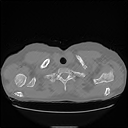

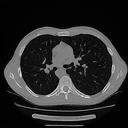

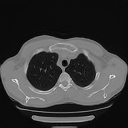

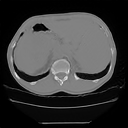

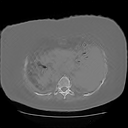

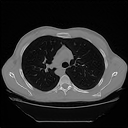

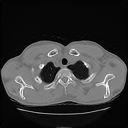

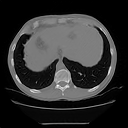

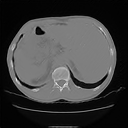

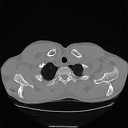

In [96]:
from IPython.display import Image, display
import os

image_names = os.listdir('/kaggle/working/generated/128/400')
for name in image_names:
    display(Image(filename=os.path.join('/kaggle/working/generated/128/400', name)))

## 2.2 Generation 64x64

In [62]:
!wget -P /kaggle/working https://www.dropbox.com/s/m2wasbhdn083u7d/ct_dataset_64_1500_500_results.zip

--2023-04-17 19:57:54--  https://www.dropbox.com/s/m2wasbhdn083u7d/ct_dataset_64_1500_500_results.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/m2wasbhdn083u7d/ct_dataset_64_1500_500_results.zip [following]
--2023-04-17 19:57:55--  https://www.dropbox.com/s/raw/m2wasbhdn083u7d/ct_dataset_64_1500_500_results.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8d9df42fe21eb23c0f817168d4.dl.dropboxusercontent.com/cd/0/inline/B6VlBIFOUOhKk9MB8rpOknC001ozMZC9LvaOCfSZdNRPhs1VDivon4O6b_oEkOtYDt9Z3UskG_PHMVJaVOc-1atJH_CIfn1-0fXLDwvOqVQzY8YTur3du742TYk_NMBJSkFU7IbcB80S57pp-PwfFq0O4u-7M_fgxzpf96iJK0Nnqw/file# [following]
--2023-04-17 19:57:55--  https://uc8d9df42fe21eb23c0f817168d4.dl.dropboxusercontent.com/cd/0/inline/B6VlBIFOUOhKk9

In [64]:
!unzip /kaggle/working/ct_dataset_64_1500_500_results.zip

Archive:  /kaggle/working/ct_dataset_64_1500_500_results.zip
   creating: training-runs/00001-ct_dataset_64_1500-auto1-kimg500/
  inflating: training-runs/00001-ct_dataset_64_1500-auto1-kimg500/stats.jsonl  
  inflating: training-runs/00001-ct_dataset_64_1500-auto1-kimg500/events.out.tfevents.1681153793.3016478af719.949.0  
  inflating: training-runs/00001-ct_dataset_64_1500-auto1-kimg500/log.txt  
  inflating: training-runs/00001-ct_dataset_64_1500-auto1-kimg500/fakes000500.png  
  inflating: training-runs/00001-ct_dataset_64_1500-auto1-kimg500/reals.png  
  inflating: training-runs/00001-ct_dataset_64_1500-auto1-kimg500/fakes000400.png  
  inflating: training-runs/00001-ct_dataset_64_1500-auto1-kimg500/metric-fid50k_full.jsonl  
  inflating: training-runs/00001-ct_dataset_64_1500-auto1-kimg500/network-snapshot-000200.pkl  
  inflating: training-runs/00001-ct_dataset_64_1500-auto1-kimg500/training_options.json  
  inflating: training-runs/00001-ct_dataset_64_1500-auto1-kimg500/fakes00

In [79]:
!ls /kaggle/working/stylegan2-ada-pytorch/training-runs/00001-ct_dataset_64_1500-auto1-kimg500

events.out.tfevents.1681153793.3016478af719.949.0  network-snapshot-000000.pkl
fakes000000.png					   network-snapshot-000200.pkl
fakes000200.png					   network-snapshot-000400.pkl
fakes000400.png					   network-snapshot-000500.pkl
fakes000500.png					   reals.png
fakes_init.png					   stats.jsonl
log.txt						   training_options.json
metric-fid50k_full.jsonl


In [99]:
!python generate.py --outdir=/kaggle/working/generated/64/000 --trunc=1 --seeds=85,265,297,849,56,34,2,9,500,762   \
    --network=/kaggle/working/stylegan2-ada-pytorch/training-runs/00001-ct_dataset_64_1500-auto1-kimg500/network-snapshot-000000.pkl

Loading networks from "/kaggle/working/stylegan2-ada-pytorch/training-runs/00001-ct_dataset_64_1500-auto1-kimg500/network-snapshot-000000.pkl"...
Generating image for seed 85 (0/10) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 265 (1/10) ...
Generating image for seed 297 (2/10) ...
Generating image for seed 849 (3/10) ...
Generating image for seed 56 (4/10) ...
Generating image for seed 34 (5/10) ...
Generating image for seed 2 (6/10) ...
Generating image for seed 9 (7/10) ...
Generating image for seed 500 (8/10) ...
Generating image for seed 762 (9/10) ...


In [102]:
!python generate.py --outdir=/kaggle/working/generated/64/200 --trunc=1 --seeds=85,265,297,849,56,34,2,9,500,762   \
    --network=/kaggle/working/stylegan2-ada-pytorch/training-runs/00001-ct_dataset_64_1500-auto1-kimg500/network-snapshot-000200.pkl

Loading networks from "/kaggle/working/stylegan2-ada-pytorch/training-runs/00001-ct_dataset_64_1500-auto1-kimg500/network-snapshot-000200.pkl"...
Generating image for seed 85 (0/10) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 265 (1/10) ...
Generating image for seed 297 (2/10) ...
Generating image for seed 849 (3/10) ...
Generating image for seed 56 (4/10) ...
Generating image for seed 34 (5/10) ...
Generating image for seed 2 (6/10) ...
Generating image for seed 9 (7/10) ...
Generating image for seed 500 (8/10) ...
Generating image for seed 762 (9/10) ...


In [103]:
!python generate.py --outdir=/kaggle/working/generated/64/400 --trunc=1 --seeds=85,265,297,849,56,34,2,9,500,762   \
    --network=/kaggle/working/stylegan2-ada-pytorch/training-runs/00001-ct_dataset_64_1500-auto1-kimg500/network-snapshot-000400.pkl

Loading networks from "/kaggle/working/stylegan2-ada-pytorch/training-runs/00001-ct_dataset_64_1500-auto1-kimg500/network-snapshot-000400.pkl"...
Generating image for seed 85 (0/10) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 265 (1/10) ...
Generating image for seed 297 (2/10) ...
Generating image for seed 849 (3/10) ...
Generating image for seed 56 (4/10) ...
Generating image for seed 34 (5/10) ...
Generating image for seed 2 (6/10) ...
Generating image for seed 9 (7/10) ...
Generating image for seed 500 (8/10) ...
Generating image for seed 762 (9/10) ...


In [104]:
!python generate.py --outdir=/kaggle/working/generated/64/500 --trunc=1 --seeds=85,265,297,849,56,34,2,9,500,762   \
    --network=/kaggle/working/stylegan2-ada-pytorch/training-runs/00001-ct_dataset_64_1500-auto1-kimg500/network-snapshot-000500.pkl

Loading networks from "/kaggle/working/stylegan2-ada-pytorch/training-runs/00001-ct_dataset_64_1500-auto1-kimg500/network-snapshot-000500.pkl"...
Generating image for seed 85 (0/10) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 265 (1/10) ...
Generating image for seed 297 (2/10) ...
Generating image for seed 849 (3/10) ...
Generating image for seed 56 (4/10) ...
Generating image for seed 34 (5/10) ...
Generating image for seed 2 (6/10) ...
Generating image for seed 9 (7/10) ...
Generating image for seed 500 (8/10) ...
Generating image for seed 762 (9/10) ...


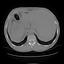

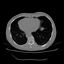

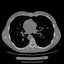

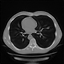

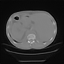

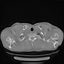

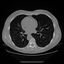

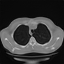

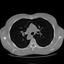

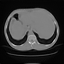

In [105]:
image_names = os.listdir('/kaggle/working/generated/64/500')
for name in image_names:
    display(Image(filename=os.path.join('/kaggle/working/generated/64/500', name)))

### saving generated images

In [106]:
!zip  -r /kaggle/working/generated.zip /kaggle/working/generated

  adding: kaggle/working/generated/ (stored 0%)
  adding: kaggle/working/generated/128/ (stored 0%)
  adding: kaggle/working/generated/128/200/ (stored 0%)
  adding: kaggle/working/generated/128/200/seed0297.png (stored 0%)
  adding: kaggle/working/generated/128/200/seed0034.png (stored 0%)
  adding: kaggle/working/generated/128/200/seed0085.png (stored 0%)
  adding: kaggle/working/generated/128/200/seed0849.png (stored 0%)
  adding: kaggle/working/generated/128/200/seed0762.png (stored 0%)
  adding: kaggle/working/generated/128/200/seed0009.png (stored 0%)
  adding: kaggle/working/generated/128/200/seed0265.png (stored 0%)
  adding: kaggle/working/generated/128/200/seed0500.png (stored 0%)
  adding: kaggle/working/generated/128/200/seed0056.png (stored 0%)
  adding: kaggle/working/generated/128/200/seed0002.png (stored 0%)
  adding: kaggle/working/generated/128/750/ (stored 0%)
  adding: kaggle/working/generated/128/750/seed0297.png (stored 0%)
  adding: kaggle/working/generated/128/7

In [ ]:
!zip 